# Identify Customer Segments For Online Retail With The Use Of K-Means Clustering


## Disabling Python Warnings

In [1]:
#Ignore Python Warnings
import warnings as war
war.filterwarnings('ignore')

## Importing Libraries 

In [2]:
# Importing all the required libraries for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Importing required Dataset for EDA

In [3]:
#Reading required Dataset excel file and storing its contains into 'online_df' DataFrame & then checking its head()

online_df = pd.read_excel("Dataset\Online Retail.xlsx")
online_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Checking various stats of our Dataset

In [4]:
# Checking Shape of our Dataset

online_df.shape

(541909, 8)

>**Insight,**
>- **We can see, there are more than 540K Rows and 8 Columns in our Dataset.**

In [5]:
# Checking information about the Dataset and its Datatype.

online_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> **Insight,**
>- **Looking at the data, we can say their are 2 columns with the missing values, for which data cleaning is required before analysis.**

In [6]:
# Now, lets check the Descriptive statistical summary of all the columns in our dataset. 

online_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


> **Insight,** 
> - **As per statistical summary, we can see their are negative values in Quantity and UnitPrice.**

# Data pre-processing

### Removing case mis-match

Creating Function to convert alphabetic characters to uppercase

In [7]:
# Creating Function to convert alphabetic characters to uppercase
def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [8]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the Function Created.

online_df = online_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)

### Assigning Correct Datatype
Changing Datatype of `InvoiceDate` to 'Datetime' Datatype, `CustomerID` to 'Object' Datatype.

In [9]:
# Changing Datatype of InvoiceDate to Datetime Datatype 
online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate'])

In [10]:
# Changing datatype of CustomerID from 'float64' to 'object'
#online_df['CustomerID'] = online_df['CustomerID'].astype(int)
online_df['CustomerID'] = online_df['CustomerID'].astype(object)

In [11]:
# Checking changes in Dataset
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleaning

### Checking for Duplicates Rows Entires and Removing them 

In [12]:
# Checking for Duplicate Entires in our Dataset

online_df.duplicated().sum()

5268

In [13]:
# Removing Duplicates and checking shape change
online_df.drop_duplicates(inplace=True)
print(online_df.shape)

(536641, 8)


### Checking for Missing Values in our Dataset

In [14]:
# Checking null values in the Dataset
online_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# Checking percentage of null values
online_df.isna().sum()/len(online_df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

> **Insight,**
>- We can see, There are 2 cloumns having Missing Values
>- **`CustomerID`** cloumn has around **25.16%** missing values i.e. ~135K null values
>- **`Description`** column has around **0.27%** missing values i.e. 1454 null values  

### Treating Missing Values

To deal with missing values in **`CustomerID`**, which has around **25.16%** of null data, 
**We can Drop all the rows with missing `CustomerID`**. 

This decision was made because the aim of this project is to find customer segments by exploring data at customer level, therefore all observations that are not assigned to a particular customer cannot be used for analysis.

In [16]:
# Droping all rows that has null in `CustomerID` 
online_df.dropna(axis=0 , subset=['CustomerID'] , inplace=True)

In [17]:
# Now, let's check the changes and remaining null values in our Dataset
online_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
# Checking Shape change of our Dataset
online_df.shape

(401604, 8)

# Creating new Features

### Creating New Variable **`Order_Amount`**

In [19]:
# Creating new variable 'Order_Amount' = Quantity * UnitPrice for each order

online_df['Order_Amount'] = online_df['Quantity'] * online_df['UnitPrice']
online_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34


In [62]:
# Lets visulize the distrubution of Order_Amount
#plt.figure(figsize=[12,3])
#sns.histplot(x=online_df['Order_Amount'], kde=True)
#plt.title("Distribution of 'AMT_INCOME_TOTAL' ")
#plt.show()

### Creating New Variable **`Is_Cancelled`**

- As per the data dictionary, **`InvoiceNo`** starting with a **'C'** are the cancelled orders. 
- Thus, creating new feature variable **`Is_Cancelled`**, having value **'0'** if the order is **Not Cancelled** and value **'1'** if the order is **Cancelled**.

In [20]:
online_df['Is_Cancelled'] = online_df['InvoiceNo'].apply(lambda x: 1 if isinstance(x, str) and x.startswith('C') else 0)
online_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Amount,Is_Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,UNITED KINGDOM,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,UNITED KINGDOM,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,UNITED KINGDOM,20.34,0


In [21]:
# Lets check the value count of Cancelled Orders
online_df['Is_Cancelled'].value_counts()


Is_Cancelled
0    392732
1      8872
Name: count, dtype: int64

In [22]:
# Checking the percentage of Cancelled Orders
online_df['Is_Cancelled'].value_counts()/len(online_df)*100

Is_Cancelled
0    97.790859
1     2.209141
Name: count, dtype: float64

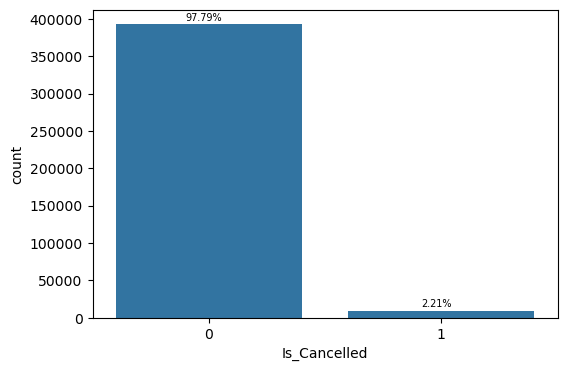

In [23]:
# Lets visulize the Cancelled order percentage
plt.figure(figsize=[6,4])
ax = sns.countplot(x=online_df['Is_Cancelled'],  legend='auto')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(online_df))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=7, color='black', xytext=(5,5),
               textcoords='offset points')
plt.show()

>**Insight,**
>- **Their are only 2.21% of Cancelled Orders (i.e. 8872)**
>- **And rest 97.79% Orders are not cancelled (i.e. 392732)**

# Data Analysis

###  Grouping data by **`CustomerID`**

Now, let start creating customer profiles by grouping data by **`CustomerID`**. This will make it easier to explore customers characteristics. 

In [25]:
# Firstly lets create an empty Dataframe as 'Customer_Profile'
Customer_Profile = pd.DataFrame()


In [26]:
# Calculating Total number of `Orders_per_Customer` and storing in Dataframe `Customer_Profile`
Customer_Profile['Order_per_Customer'] = online_df.groupby(by='CustomerID')['InvoiceNo'].count()
Customer_Profile['Order_per_Customer'].head()


CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Order_per_Customer, dtype: int64

In [27]:
# Calculating the total item quantity ordered per customer
Customer_Profile['Quantity_per_Customer'] = online_df.groupby(by='CustomerID')['Quantity'].sum()
Customer_Profile['Quantity_per_Customer'].head()


CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
Name: Quantity_per_Customer, dtype: int64

In [28]:
# Calculating the total order value per customer i.e. `Total_Spending`
Customer_Profile['Total_Spending'] = online_df.groupby(by='CustomerID')['Order_Amount'].sum()
Customer_Profile['Total_Spending'].head()


CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Total_Spending, dtype: float64

In [29]:
# Calculating the Average Unitprice per customer, to see if the customer buys expensive items or not
Customer_Profile['Avg_Item_Price'] = online_df.groupby(by='CustomerID')['UnitPrice'].mean()
Customer_Profile['Avg_Item_Price'].head()


CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
12349.0    8.289041
12350.0    3.841176
Name: Avg_Item_Price, dtype: float64

In [30]:
# Calculating total Cancelled orders by each customer
Customer_Profile['Order_Cancellations'] = online_df.groupby(by='CustomerID')['Is_Cancelled'].sum()
Customer_Profile['Order_Cancellations'].head()


CustomerID
12346.0    1
12347.0    0
12348.0    0
12349.0    0
12350.0    0
Name: Order_Cancellations, dtype: int64

In [31]:
# Now, Lets add Country of each customer in their Customer_Profile Dataframe
Customer_Profile['Country'] = online_df.groupby(by='CustomerID')['Country'].first()
Customer_Profile['Country'] 


CustomerID
12346.0    UNITED KINGDOM
12347.0           ICELAND
12348.0           FINLAND
12349.0             ITALY
12350.0            NORWAY
                ...      
18280.0    UNITED KINGDOM
18281.0    UNITED KINGDOM
18282.0    UNITED KINGDOM
18283.0    UNITED KINGDOM
18287.0    UNITED KINGDOM
Name: Country, Length: 4372, dtype: object

**Now, Let's create a new dataframe `customer_order_span` with column `Days_As_Customer` by taking the difference in days between the date of a customer's last order, and the date of their first order.**

In [32]:
# Calculating the number of Days as Customer

customer_order_span = online_df.groupby(by='CustomerID')['InvoiceDate'].agg(['min','max'])

customer_order_span['Days_As_Customer'] = (customer_order_span['max'] - customer_order_span['min']).dt.days
customer_order_span.head()

,min,max,Days_As_Customer
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00,0
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0


In [33]:
# Droping column `min` and `max` from `customer_order_span` as its not required further.
customer_order_span.drop(['min','max'], axis=1 , inplace=True)

# Checking head of 'customer_order_span'
customer_order_span.head()

,Days_As_Customer
CustomerID,
12346.0,0
12347.0,365
12348.0,282
12349.0,0
12350.0,0


Now, Let's Merge **`customer_order_span`** to **`Customer_Profile`** Dataframe

In [35]:
Customer_Profile = pd.merge(Customer_Profile , customer_order_span, on='CustomerID')
Customer_Profile.head()

,Order_per_Customer,Quantity_per_Customer,Total_Spending,Avg_Item_Price,Order_Cancellations,Country,Days_As_Customer
CustomerID,,,,,,,
12346.0,2,0,0.00,1.040000,1,UNITED KINGDOM,0
12347.0,182,2458,4310.00,2.644011,0,ICELAND,365
12348.0,31,2341,1797.24,5.764839,0,FINLAND,282
12349.0,73,631,1757.55,8.289041,0,ITALY,0
12350.0,17,197,334.40,3.841176,0,NORWAY,0


In [36]:
# Checking Shape of `Customer_Profile`
Customer_Profile.shape

(4372, 7)

After merging, Our **`Customer_Profile`** dataset contains the following variables:
- **`CustomrID`** : Customer unique identierfier
- **`Order_per_Customer`** : Total number Orders made by each customer
- **`Quantity_per_Customer`** : Total Quantity of orders placed by each customer 
- **`Total_Spending`** : Total amount spend by each customer
- **`Avg_Item_Price`** : Average price of items purchased by the customer
- **`Order_Cancellations`** : Total number of orders cancelled by each customer 
- **`Country`** : Country of the Customer
- **`Days_As_Customer`** : Number of days between first and last order placed by the customerer